<a href="https://colab.research.google.com/github/Imran-co/Machine-Intelligence--2-/blob/main/Project_Final_Snake_and_Ladder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Episode 1000/50000 | Avg Reward: 97.3 | Avg Steps: 48.2 | Epsilon: 0.951 | Time: 0.3s
Episode 2000/50000 | Avg Reward: 104.3 | Avg Steps: 42.0 | Epsilon: 0.905 | Time: 0.6s
Episode 3000/50000 | Avg Reward: 109.9 | Avg Steps: 38.4 | Epsilon: 0.861 | Time: 0.8s
Episode 4000/50000 | Avg Reward: 113.3 | Avg Steps: 33.6 | Epsilon: 0.819 | Time: 1.1s
Episode 5000/50000 | Avg Reward: 115.9 | Avg Steps: 31.1 | Epsilon: 0.779 | Time: 1.3s
Episode 6000/50000 | Avg Reward: 118.4 | Avg Steps: 29.4 | Epsilon: 0.741 | Time: 1.5s
Episode 7000/50000 | Avg Reward: 119.7 | Avg Steps: 25.4 | Epsilon: 0.705 | Time: 1.7s
Episode 8000/50000 | Avg Reward: 121.7 | Avg Steps: 24.2 | Epsilon: 0.670 | Time: 1.8s
Episode 9000/50000 | Avg Reward: 122.6 | Avg Steps: 22.4 | Epsilon: 0.638 | Time: 2.1s
Episode 10000/50000 | Avg Reward: 123.3 | Avg Steps: 21.9 | Epsilon: 0.607 | Time: 2.4s
Episode 11000/50000 | Avg Reward: 123.5 | Avg Steps: 19.8 | Epsilon: 0.577 | Time: 2.6s
Episode 12000/50000 | Avg Reward: 125.0 | 

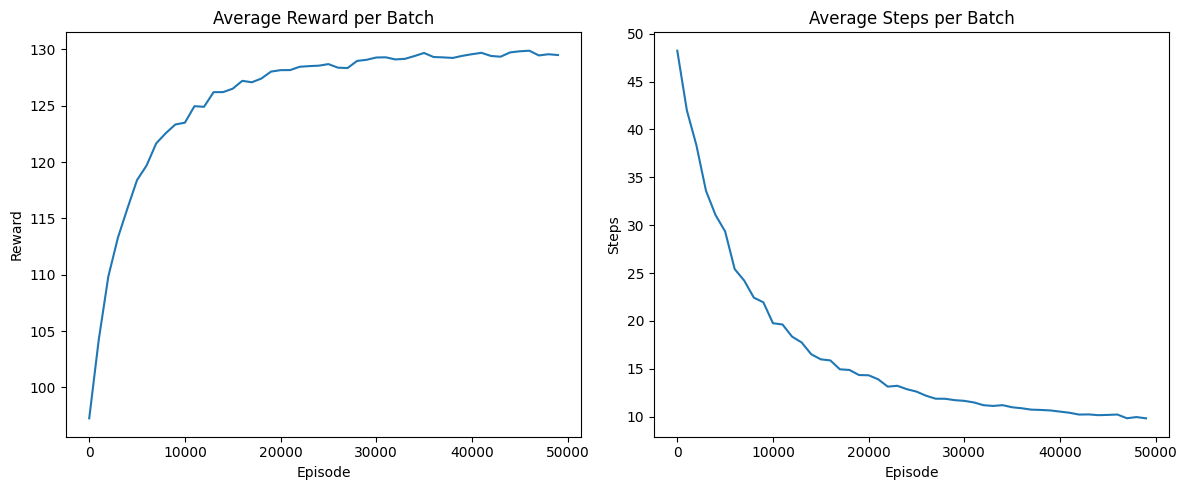


Evaluation Results:
Average steps: 9.0
Minimum steps: 9
Maximum steps: 9
Standard deviation: 0.0


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from time import time

# Board configuration
N = 100
ladders = {4: 14, 9: 31, 20: 38, 28: 84, 40: 59, 51: 67, 63: 81, 71: 91}
snakes = {17: 7, 54: 34, 62: 19, 64: 60, 87: 36, 93: 73, 95: 75, 98: 79}

def move(pos, dice):
    next_pos = pos + dice
    if next_pos > N:
        return pos  # Cannot move if overshoots N
    else:
        return snakes.get(next_pos, ladders.get(next_pos, next_pos))

# Q-learning parameters
q_table = np.random.uniform(low=-1, high=1, size=(N + 1, 6))  # States 0-100, Actions 0-5
alpha = 0.3  # Reduced learning rate for stability
gamma = 0.95  # Slightly reduced discount factor
epsilon_start = 1.0
epsilon_end = 0.01
epsilon_decay = 0.99995  # Slower decay
episodes = 50000
batch_size = 1000  # For progress reporting

# Track training progress
rewards_per_batch = []
steps_per_batch = []
batch_rewards = []
batch_steps = []

start_time = time()

for ep in range(1, episodes + 1):
    state = 1  # Start position
    total_reward = 0
    steps = 0
    epsilon = max(epsilon_end, epsilon_start * (epsilon_decay ** ep))

    while state < N:
        # Epsilon-greedy action selection
        if random.random() < epsilon:
            action = random.randint(0, 5)
        else:
            action = np.argmax(q_table[state])

        dice = action + 1
        next_state = move(state, dice)

        # Ensure next_state is within valid range [1, N]
        next_state = max(1, min(N, next_state))

        # Reward calculation
        if next_state == N:
            reward = 100
        elif next_state in ladders.values():
            reward = 5  # Reduced ladder bonus
        elif next_state in snakes.values():
            reward = -5  # Reduced snake penalty
        else:
            reward = -0.1  # Smaller step penalty

        # Q-table update
        best_next_action = np.argmax(q_table[next_state])
        td_target = reward + gamma * q_table[next_state, best_next_action]
        td_error = td_target - q_table[state, action]
        q_table[state, action] += alpha * td_error

        state = next_state
        total_reward += reward
        steps += 1

    # Batch processing for efficiency
    batch_rewards.append(total_reward)
    batch_steps.append(steps)

    if ep % batch_size == 0:
        avg_reward = np.mean(batch_rewards)
        avg_steps = np.mean(batch_steps)
        rewards_per_batch.append(avg_reward)
        steps_per_batch.append(avg_steps)
        batch_rewards = []
        batch_steps = []

        print(f"Episode {ep}/{episodes} | "
              f"Avg Reward: {avg_reward:.1f} | "
              f"Avg Steps: {avg_steps:.1f} | "
              f"Epsilon: {epsilon:.3f} | "
              f"Time: {time() - start_time:.1f}s")

        # Early stopping if optimal
        if avg_steps <= 10 and epsilon <= 0.05:
            print(f"Early stopping at episode {ep} - optimal performance reached")
            break

# Plot training progress
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(rewards_per_batch)) * batch_size, rewards_per_batch)
plt.title("Average Reward per Batch")
plt.xlabel("Episode")
plt.ylabel("Reward")

plt.subplot(1, 2, 2)
plt.plot(np.arange(len(steps_per_batch)) * batch_size, steps_per_batch)
plt.title("Average Steps per Batch")
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.tight_layout()
plt.show()

# Evaluation
def evaluate_agent(num_games=100):
    steps = []
    for _ in range(num_games):
        state = 1
        game_steps = 0
        while state < N:
            action = np.argmax(q_table[state])
            state = move(state, action + 1)
            game_steps += 1
        steps.append(game_steps)

    print("\nEvaluation Results:")
    print(f"Average steps: {np.mean(steps):.1f}")
    print(f"Minimum steps: {np.min(steps)}")
    print(f"Maximum steps: {np.max(steps)}")
    print(f"Standard deviation: {np.std(steps):.1f}")

evaluate_agent()

In [8]:
import numpy as np
from PIL import Image, ImageDraw
import math

# Function to get coordinates for each square on the board image
def get_square_coords(board_img_shape, N=100, grid_size=10):
    img_width, img_height = board_img_shape
    # Assuming a standard 10x10 board, calculate cell size
    cell_width = img_width / grid_size
    cell_height = img_height / grid_size
    coords = {}
    # Iterate through squares 1 to N
    for i in range(1, N + 1):
        # Calculate row and column based on typical board numbering (1 at bottom left, increasing row by row)
        # Rows are indexed from bottom to top (0 to grid_size-1)
        # Columns are indexed from left to right (0 to grid_size-1)

        # Determine the row and column in the grid layout
        grid_row = (i - 1) // grid_size
        grid_col = (i - 1) % grid_size

        # Snake and Ladder boards often alternate direction of numbering rows.
        # Let's assume row 0 (bottom) goes left-to-right (1-10), row 1 goes right-to-left (11-20), and so on.
        # We need to calculate the visual column based on this alternating pattern.

        # If the grid row is even (0, 2, 4, ...), columns go left-to-right.
        if grid_row % 2 == 0:
            visual_col = grid_col
        # If the grid row is odd (1, 3, 5, ...), columns go right-to-left.
        else:
            visual_col = grid_size - 1 - grid_col

        # Visual rows on the image are from top to bottom.
        # The bottom-most grid row (grid_row 0) corresponds to the highest visual row index.
        visual_row = grid_size - 1 - grid_row

        # Calculate the center coordinates of the square
        center_x = (visual_col + 0.5) * cell_width
        center_y = (visual_row + 0.5) * cell_height

        coords[i] = (center_x, center_y)
    return coords

def visualize_game(board_path, agent_path, steps_history, N=100, grid_size=10, output_prefix="game_frame"):
    """
    Visualizes the agent's movement on the board.

    Args:
        board_path (str): Path to the snake and ladder board image.
        agent_path (str): Path to the agent image.
        steps_history (list): A list of square numbers representing the agent's path.
        N (int): Total number of squares on the board.
        grid_size (int): The size of the board grid (e.g., 10 for 10x10).
        output_prefix (str): Prefix for the output image file names.
    """
    try:
        board_img = Image.open(board_path).convert("RGBA")
    except FileNotFoundError:
        print(f"Error: Board image not found at {board_path}")
        return
    try:
        agent_img_original = Image.open(agent_path).convert("RGBA")
    except FileNotFoundError:
        print(f"Error: Agent image not found at {agent_path}")
        return

    board_width, board_height = board_img.size

    # Calculate the size for the agent image based on cell size
    cell_width = board_width / grid_size
    cell_height = board_height / grid_size
    agent_size = int(min(cell_width, cell_height) * 0.8) # Agent is 80% of cell size

    agent_img = agent_img_original.resize((agent_size, agent_size))

    # Get coordinates for each square
    square_coords = get_square_coords(board_img.size, N, grid_size)

    # Create and save frames
    for i, pos in enumerate(steps_history):
        if pos not in square_coords:
            print(f"Warning: Position {pos} is out of expected board range 1-{N}. Skipping frame {i}.")
            continue

        frame = board_img.copy()
        draw = ImageDraw.Draw(frame)

        # Get the center coordinates for the current position
        center_x, center_y = square_coords[pos]

        # Calculate top-left corner for pasting the agent image
        agent_x = int(center_x - agent_size / 2)
        agent_y = int(center_y - agent_size / 2)

        # Ensure agent stays within board boundaries
        agent_x = max(0, min(agent_x, board_width - agent_size))
        agent_y = max(0, min(agent_y, board_height - agent_size))


        # Paste the agent image onto the frame
        frame.paste(agent_img, (agent_x, agent_y), agent_img)

        # Add text for current position (optional)
        # draw.text((agent_x, agent_y - 20), str(pos), fill=(0, 0, 0))


        # Save the frame
        frame_path = f"{output_prefix}_{i:04d}.png"
        frame.save(frame_path)
        # print(f"Saved {frame_path}") # Optional: print progress

# --- How to use this function after the Q-learning code runs ---

# 1. Save Agent.png and snake ladder board.jpg to your Colab environment.
# You can use the file upload feature:
# from google.colab import files
# uploaded = files.upload()
# This will save the files in the current directory.

# 2. Simulate a game using the trained Q-table to get the steps history
def simulate_game_steps(q_table, N=100):
    """Simulates one game using the learned Q-table and returns the sequence of positions."""
    state = 1
    steps_history = [state]
    while state < N:
        action = np.argmax(q_table[state])
        dice_roll = action + 1
        state = move(state, dice_roll) # Use the original move function
        steps_history.append(state)
    return steps_history

# After your Q-learning training loop finishes:
print("\nSimulating one game for visualization...")
game_path = simulate_game_steps(q_table, N)

# 3. Specify paths to your images
board_image_path = "snake ladder board.jpg" # Make sure this is the correct filename
agent_image_path = "Agent.png"          # Make sure this is the correct filename

# 4. Run the visualization function
print("Generating visualization frames...")
visualize_game(board_image_path, agent_image_path, game_path, N=N, grid_size=10, output_prefix="game_frame")

print("\nVisualization frames generated. You can now combine them into a GIF or video.")
print("Example: To create a GIF using imagemagick (if installed locally or in Colab):")
print("!apt install imagemagick") # Install if not present
print("!convert -delay 20 -loop 0 game_frame_*.png game_animation.gif")


Simulating one game for visualization...
Generating visualization frames...

Visualization frames generated. You can now combine them into a GIF or video.
Example: To create a GIF using imagemagick (if installed locally or in Colab):
!apt install imagemagick
!convert -delay 20 -loop 0 game_frame_*.png game_animation.gif


In [9]:
!apt install imagemagick
!convert -delay 20 -loop 0 game_frame_*.png game_animation.gif

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
imagemagick is already the newest version (8:6.9.11.60+dfsg-1.3ubuntu0.22.04.5).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


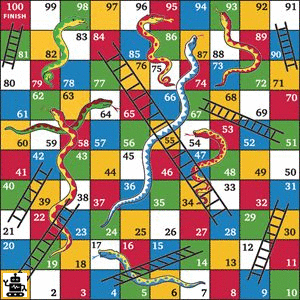

In [10]:

from IPython.display import Image as IPyImage
from IPython.display import display

try:
    display(IPyImage(filename='game_animation.gif'))
except FileNotFoundError:
    print("GIF file not found. Ensure imagemagick created it correctly.")
